In [36]:
# 바퀴와 날개의 유무에 따라, '배','자동차','비행기'로 분류하는 신경망 모델
# 신경망은 3개의 다층 레이어로 구성
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# [바퀴 있으면 1 없으면 0, 날개 있으면 1 없으면 0]
x_data = np.array([[0, 0], [1, 0], [1, 1], [0, 0], [0, 0], [0, 1]])

# [배, 자동차, 비행기]
y_data = np.array([
  [1, 0, 0], # 배
  [0, 1, 0], # 자동차
  [0, 0, 1], # 비행기
  [1, 0, 0], # 배
  [1, 0, 0], # 배
  [0, 0, 1] # 비행기
])

In [37]:
# 모델 정의
model = Sequential()
model.add(Dense(input_dim=2, units=10, activation='tanh'))
model.add(Dense(units=7, activation='tanh'))
model.add(Dense(units=5, activation='tanh'))

# 3개의 출력 유닛을 가진 소프트맥스 층을 추가
model.add(Dense(units=3, activation='softmax'))

print("=============initial weights==========")
for weight in model.weights:
  print(weight)
  model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.01),
                loss='categorical_crossentropy', metrics=['accuracy']) # Adam 사용
model.summary()
history = model.fit(x_data, y_data, epochs=1000, batch_size=1)

=============initial weights==========
<tf.Variable 'dense_29/kernel:0' shape=(2, 10) dtype=float32, numpy=
array([[ 4.5077330e-01,  1.7446786e-01,  4.6037763e-01,  4.1739041e-01,
        -1.6321284e-01,  4.9494606e-01, -5.0492144e-01, -4.2275614e-01,
         1.6710430e-01,  2.6785046e-01],
       [ 1.7499924e-04, -6.0337561e-01,  2.9043746e-01,  2.9849797e-01,
        -6.1713052e-01,  5.9859520e-01, -2.6703298e-01,  1.6279948e-01,
        -4.6467119e-01,  6.2436819e-02]], dtype=float32)>
<tf.Variable 'dense_29/bias:0' shape=(10,) dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>
<tf.Variable 'dense_30/kernel:0' shape=(10, 7) dtype=float32, numpy=
array([[ 0.42809415,  0.21299154,  0.34508252, -0.09519416,  0.04030645,
        -0.19348758,  0.16953456],
       [ 0.4172486 ,  0.37865257, -0.21387535, -0.3650241 ,  0.26452363,
         0.09515452,  0.11811447],
       [ 0.4977373 ,  0.22863883,  0.452749  ,  0.5799154 , -0.05755639,
        -0.24777746

In [39]:
print("=============weights==========")
for weight in model.weights:
  print(weight)

print("=============test results==========")
print(x_data)

# 모델 사용해서 결과 예측해보기
print(model.predict(x_data))

# 모델 사용해서 테스트 데이터로 성능 평가하기 (loss[0]와 Accuracy[1])
print("\n Accuracy: %.4f" % (model.evaluate(x_data, y_data)[1])) # list index
print("===================================")

=============weights==========
<tf.Variable 'dense_29/kernel:0' shape=(2, 10) dtype=float32, numpy=
array([[ 0.6406511 ,  0.4312683 ,  0.8259469 ,  0.9296633 ,  0.12634227,
         0.20034006, -0.5856347 , -0.61931664,  0.09473697,  0.24952926],
       [-0.15089644, -1.181057  ,  0.6503271 ,  0.9051942 , -1.3145431 ,
         0.4937894 , -0.64116055,  0.1921244 , -0.5130982 , -0.43209043]],
      dtype=float32)>
<tf.Variable 'dense_29/bias:0' shape=(10,) dtype=float32, numpy=
array([-0.22698325, -0.04324423, -0.23842275, -0.26316854,  0.1340676 ,
        0.0853204 ,  0.37029928,  0.19532175,  0.20898618,  0.21244119],
      dtype=float32)>
<tf.Variable 'dense_30/kernel:0' shape=(10, 7) dtype=float32, numpy=
array([[ 0.6473185 ,  0.49598074,  0.7324955 , -0.27140376, -0.22938617,
        -0.42251062,  0.08315268],
       [ 0.41767576,  1.0401025 , -0.340792  , -0.8691185 ,  0.2787665 ,
        -0.63840747, -0.4905805 ],
       [ 0.9373    ,  0.35102788,  1.07929   ,  0.6214135 , -0.475

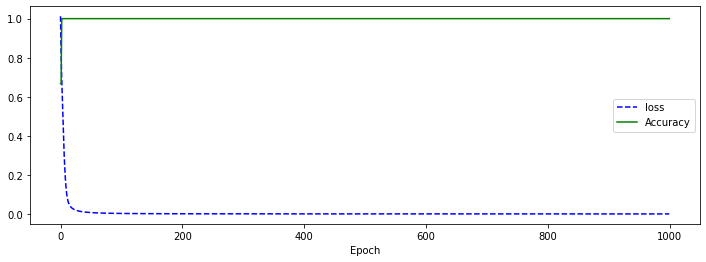

In [40]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4)) #그래프의 가로세로 비율
plt.subplot(1,1,1) #1행1열의 첫 번째 위치
plt.plot(history.history['loss'], 'b--', label='loss') #loss는 파란색 점선
plt.plot(history.history['accuracy'], 'g-', label='Accuracy') #accuracy는 녹색실선
plt.xlabel('Epoch')
plt.legend()
plt.show()